In [1]:
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv("train_data.csv")
df2 = pd.read_csv("test_data.csv")

In [3]:
#display the first 5 rows of the dataset
print(df.head())

                                         review_text sentiment_label
0  Bromwell High is a cartoon comedy. It ran at t...        positive
1  Homelessness (or Houselessness as George Carli...        positive
2  Brilliant over-acting by Lesley Ann Warren. Be...        positive
3  This is easily the most underrated film inn th...        positive
4  This is not the typical Mel Brooks film. It wa...        positive


In [4]:
#displaying the column names
print(df.columns)

Index(['review_text', 'sentiment_label'], dtype='object')


In [5]:
#accessing unique labels values
train_labels = df['sentiment_label']
print(train_labels.unique())

test_labels = df2['sentiment_label']

['positive' 'negative']


In [6]:
#counting the number of occurrence of each labels
label_counts = train_labels.value_counts()
print(label_counts)

sentiment_label
positive    12500
negative    12500
Name: count, dtype: int64


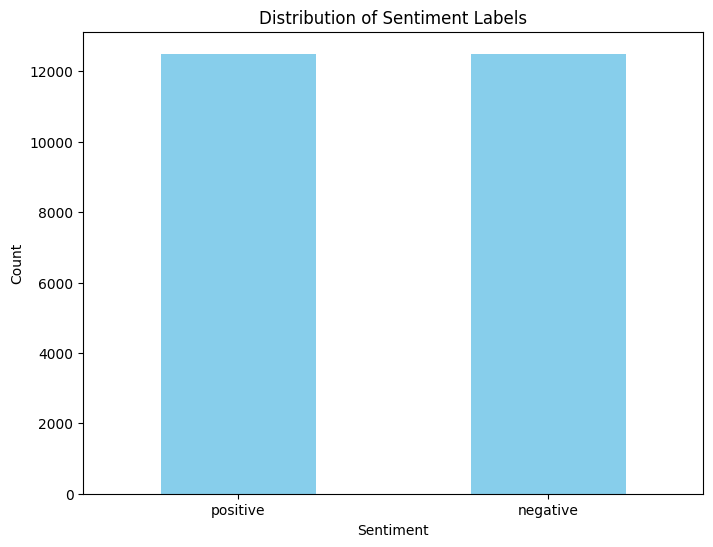

In [7]:
##Visualizing label distribution
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
label_counts.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Dataset Preprocessing

In [8]:
from nltk.tokenize import word_tokenize

#Tokenize the train text data
tokenized_train_reviews = [word_tokenize(train_review) for train_review in df['review_text']]
#Tokenize the test text data
tokenized_test_reviews = [word_tokenize(test_review) for test_review in df['review_text']]

In [9]:
print(tokenized_train_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the string labels and transform them into numerical labels
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.fit_transform(test_labels)
# Print the unique numerical labels
print(train_labels)
print(train_labels)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [11]:
import numpy as np

In [12]:
import re

def clean_text(text):
    #Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    #Remove special characters, punctuations and white space
    clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)
    return clean_text
#concatenate tokens with each review into a single string
concatenated_train_reviews = [' '.join(train_review) for train_review in tokenized_train_reviews ]
#clean the text data
cleaned_train_reviews = [clean_text(train_review) for train_review in concatenated_train_reviews]

#implementing the same for test data
#concatenate tokens with each review into a single string
concatenated_test_reviews = [' '.join(test_review) for test_review in tokenized_test_reviews ]
#clean the text data
cleaned_test_reviews = [clean_text(test_review) for test_review in concatenated_test_reviews]

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

#Remove stopwords from tokenized reviews if any
filtered_train_reviews = [remove_stopwords(train_review) for train_review in tokenized_train_reviews]
filtered_test_reviews = [remove_stopwords(test_review) for test_review in tokenized_test_reviews]

In [14]:
print(filtered_train_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
def normalize_text(tokens):
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

#Normalize the tokenized reviews
normalized_train_reviews = [normalize_text(train_review) for train_review in filtered_train_reviews]
normalized_train_reviews_str = [' '.join(train_review) for train_review in normalized_train_reviews]

#Same for test data
normalized_test_reviews = [normalize_text(test_review) for test_review in filtered_test_reviews]
normalized_test_reviews_str = [' '.join(test_review) for test_review in normalized_test_reviews]

# Dataset Preparation

###### The following steps involves Converting the process dataset to into numerical representation particarly Bag-of-words. The original dataset already contains the Bag-of-words but for the sake of knowledge and control over the dataset I decided to redo the process.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#initialize the countVectorizer
vectorizer = CountVectorizer(max_features = 5000)

#combine the normalized text data from both training and testing sets
normalized_reviews_str = normalized_train_reviews_str + normalized_test_reviews_str

#fit the vectorizer on the combined text data
vectorizer.fit(normalized_reviews_str)

#Transform the preprocessed text data into bag of words vector for both training and testing sets
X_train_bow = vectorizer.transform(normalized_train_reviews_str)
X_test_bow = vectorizer.transform(normalized_test_reviews_str)

# Model Building

###### Using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
#Initialize the logistic Regression Model
model = LogisticRegression()

In [20]:
#Train the model on the training data
model.fit(X_train_bow, train_labels)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("X_train_bow shape:", X_train_bow.shape)
print("train_labels shape:", X_test_bow.shape)

X_train_bow shape: (25000, 5000)
train_labels shape: (25000, 5000)


In [22]:
print("Length of normalized_train_reviews_str:", len(normalized_train_reviews_str))
print("Length of normalized_test_reviews_str:", len(normalized_test_reviews_str))


Length of normalized_train_reviews_str: 25000
Length of normalized_test_reviews_str: 25000


In [25]:
# Evaluate the model on the testing data
accuracy = model.score(X_test_bow, test_labels)
print("Accuracy:", accuracy)


Accuracy: 0.95964
